<a href="https://colab.research.google.com/github/Arin0110/Object_Classification_CIFAR-10_using_Resnet_50/blob/main/CIFAR_10_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api
!kaggle competitions download -c cifar-10

100% 714M/715M [00:33<00:00, 24.1MB/s]
100% 715M/715M [00:33<00:00, 22.6MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
 #As we see,there is a zipped file
 #To extract it
 from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.0 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
#We see an additional file Train

Importing dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
#PIL(pillow) is an image processing library

In [ ]:
filenames = os.listdir('/content/train')
#os.listdir will list down all the files present in the given path

In [ ]:
type(filenames)
#Its a python list

list

In [ ]:
len(filenames)

50000

In [ ]:
#So ,out of 60000,training data contains 50000 images with labels
#10000 for testing(we dont have labels for these)

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['10373.png', '17497.png', '16090.png', '7166.png', '8570.png']
['49036.png', '39914.png', '17051.png', '20134.png', '2858.png']


In [ ]:
#One thing to observe,the ids(images) are not in order

Labels Processing


In [ ]:
#labels are in the form of a csv file,and we would make them into a pd dataframe

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id']==10373]


,id,label
10372,10373,deer


In [ ]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head(15)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
#Now as the labels are strings(categorical variables),we need to convert it to numbers

In [ ]:
#On way:Label encoder
#ONe Hot Encoding
#But,we will do it manually

In [ ]:
#To find number of labels

labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]
#labels variable is the labels_df after applying the numerical


In [ ]:

print(labels_df.head())
print(labels[0:5])
print(labels[-5:])

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


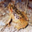

In [ ]:
# displaying sample image

#Using Opencv
import cv2
#in colab imshow() function doest work(i.e it doesnt stay for some ms and then disappear)
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

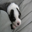

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
#The above img looks like a dog,lets verify
labels_df[labels_df['id']==45888]

,id,label
45887,45888,dog


In [ ]:
# we need to create a list from 1 to 50000

id_list=list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [ ]:
# convert images to numpy arrays
#We could have resized also
train_data_folder = '/content/train/'#Last frwd slash is imp cuzuske bina train/1.png nhi aayega(which we r doing in the next step)

#Empty list as data
#It will contain numpy array of each of the object in the train_data_folder
data = []

for id in id_list:
          #This Image is imported from PIL library
  image = Image.open(train_data_folder + str(id) + '.png')

  #To convert to numpy array
  image = np.array(image)
  data.append(image)

In [ ]:
train_data_folder = '/content/train/'
for id in id_list:

  img_path = train_data_folder + str(id) + '.png'
  print(img_path)

  if id>=5:
    break

/content/train/1.png
/content/train/2.png
/content/train/3.png
/content/train/4.png
/content/train/5.png


In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
##In data where you dont have all the images to be 32*32,we should ensure that we are transforming them,and then passing into the neura network

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
##50,000 images each with 32*32*3

Train Test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

##If we dont use random state,then next time when we run the model,the train and test division will contain differenet set of images

#Random state to retain the particular state

In [ ]:
print(X.shape)
print( X_train.shape, X_test.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

#Types:Feature scaling,min-max scaling
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
#Every value is now between 0 and 1

X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [ ]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

#keras is the wrapper function

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

#Input layer,Hidden layer,Output layer


#Generally,when its a binary classification problem,we use sigmoid as the activation function
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
#flatten will do 32*32*3 number of input nodes

#The second layer,which we have added is the hidden layer,with 64 neurons

#We can use anything other than 64,but ppl generally use a power of 2(computationally efficient)



In [ ]:
#Compile the neural network

#Optimiser is the one which updates the weights
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
##If we had used One Hot encoded labels,we could use loss function as categorical_entropy
#We have numerical encoded labels
#As its a classification problem,we used metrics as accuracy

In [ ]:
##Training the neural network

model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

#1 epoch is 1 frwd propagation + 1 backward propagation and weights will get updated
#In each epoch,10% data will be reserved for testing
#In each epoch,we will get a training accuracy and validation accuracy

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 2.0869 - acc: 0.1942 - val_loss: 2.0088 - val_acc: 0.2395
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9442 - acc: 0.2863 - val_loss: 1.9050 - val_acc: 0.3022
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9098 - acc: 0.2992 - val_loss: 1.8779 - val_acc: 0.3150
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8912 - acc: 0.3090 - val_loss: 1.8663 - val_acc: 0.3207
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8768 - acc: 0.3128 - val_loss: 1.8972 - val_acc: 0.3185
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8713 - acc: 0.3185 - val_loss: 1.8699 - val_acc: 0.3200
Epoch 7/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8620 - acc: 0.3188 - val_loss: 1.8538 - val_acc: 0.3235
Epoch 8/10
1125/1125 [==============================] - 4s 4ms

In [ ]:
#loss function is the difference between true value and predicted value

model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8484 - acc: 0.3236 - val_loss: 1.8486 - val_acc: 0.3220
Epoch 2/50
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8444 - acc: 0.3257 - val_loss: 1.8847 - val_acc: 0.3077
Epoch 3/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8426 - acc: 0.3275 - val_loss: 1.8383 - val_acc: 0.3318
Epoch 4/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8421 - acc: 0.3276 - val_loss: 1.8389 - val_acc: 0.3385
Epoch 5/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8386 - acc: 0.3265 - val_loss: 1.8366 - val_acc: 0.3365
Epoch 6/50
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8388 - acc: 0.3272 - val_loss: 1.8501 - val_acc: 0.3220
Epoch 7/50
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8365 - acc: 0.3281 - val_loss: 1.8480 - val_acc: 0.3195
Epoch 8/50
1125/1125 [==============================] - 5s 4ms

In [ ]:
#Accuracy stands at 0.4653 even after 50 epochs


In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
##Sequential is to stack all the layers within the Sequential


In [ ]:
#CNN is just similar to any other ANN,with just a convolution layer(might be multiple Convolution layers)

In [ ]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

#It means,we are importing the weights which we got when ResNet50 model was trained on imagenet dataset
#Clocking in at 150 GB, ImageNet is quite a beast. It holds 1,281,167 images for training and 50,000 images for validation, organised in 1,000 categories.
#So,output layer in ImageNet wala model would contain 1000 nodes to distinguish 1000 categories
# include_top =false will drop the ouput layer(last layer)


##If the original model is trained on Truck objects and we are using it to predict dogs vs cats,then its useless

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
#In Dog vs Cat Classification,we used transfer learning trained on MobileNet dataset ,so we did (224,224,3)

#UpSampling2D (2,2) means height and width will be multiplied by 2 times
#we did it 3 times,32*8=256
#Next we passed to conb=volutionbase which has all these layers:(Mentioned in the summary)

#flatten to bring into single dimension




In [ ]:
#Batch Normalisation
#Normalisation:If we have 10 features in the dataset,we have to make sure that each of it is in the same range
#I previously scaled the data,so it was not a very essential step in this case,bit still it improves the performance

#bcoz,when o/p from the first hidden layer goes to second hidden layer,normalisation helps




In [ ]:
#Overfitting:training accuracy is very high,but test accuracy is low
#Dropout:It will turn off a few neurons,make it to 0,to avoid overfitting


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

##learning rate:How much is the weights changing

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

##learning rate:How much is the weights changing

In [ ]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 476s 387ms/step - loss: 1.6268 - acc: 0.4547 - val_loss: 0.8663 - val_acc: 0.7630
Epoch 2/10
1125/1125 [==============================] - 432s 384ms/step - loss: 0.9718 - acc: 0.7072 - val_loss: 0.4960 - val_acc: 0.8842
Epoch 3/10
1125/1125 [==============================] - 432s 384ms/step - loss: 0.7095 - acc: 0.8141 - val_loss: 0.3554 - val_acc: 0.9202
Epoch 4/10
1125/1125 [==============================] - 432s 384ms/step - loss: 0.5493 - acc: 0.8698 - val_loss: 0.2870 - val_acc: 0.9280
Epoch 5/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.4266 - acc: 0.9113 - val_loss: 0.2470 - val_acc: 0.9333
Epoch 6/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.3421 - acc: 0.9347 - val_loss: 0.2370 - val_acc: 0.9348
Epoch 7/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.2707 - acc: 0.9534 - val_loss: 0.2204 - val_acc: 0.9402
Epoch 8/10
1125/1125 [============

In [ ]:
h=history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy=',accuracy)

In [ ]:
##Observation:In the 5th epoch only,we achieved good accuracy(perks of using Transfer Learning)

In [ ]:
#adam as an optimizer gave a lower performance

#Note we didnt get very dis similar accuracy in train and test(Indicating,there is not overfitting)

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resize/255

#The 1 indicates at a time,a single img is to be predicted(uploaded)
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
#argmax as the output of each label is a probability value,we need the max
print(input_pred_label)

#labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
if input_pred_label ==0:
  print('The image represents an aeroplane')
elif input_pred_label==1:
  print('The image represents an automobile')
elif input_pred_label==2:
  print('The image represents a bird')
elif input_pred_label==3:
  print('The image represents a cat')
elif input_pred_label==4:
  print('The image represents a deer')
elif input_pred_label==5:
  print('The image represents a dog')
elif input_pred_label==6:
  print('The image represents a frog')
elif input_pred_label==7:
  print('The image represents a horse')
elif input_pred_label==8:
  print('The image represents a ship')
elif input_pred_label==9:
  print('The image represents a truck')
